In [1]:
#Importing necessary libaries

from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
from keplergl import KeplerGl 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#importing the dataset

df = pd.read_csv('Indian_earthquake_data.csv')
df.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"


In [3]:
#preprocessing dataset

df['Origin Time'] = pd.to_datetime(df['Origin Time'])
df['Place'] = df.apply(lambda x: x['Location'].split(',')[1], axis=1)
df.head()

C:\Users\vishw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,Place
0,2021-07-31 09:43:23,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",India
1,2021-07-30 23:04:57,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",Maharashtra
2,2021-07-30 21:31:10,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",Punjab
3,2021-07-30 13:56:31,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",Haryana
4,2021-07-30 07:19:38,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",Bhutan


In [4]:
#Visualizing with Kepler.gl
map_1 = KeplerGl(height=600)
map_1.add_data(data=df, name='Indian Earthquake Visualization')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Indian Earthquake Visualization': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [5]:
#plot related constant values
title1 = {'family':'serif','color':'black','size':20}
label1 = {'family':'serif','color':'darkred','size':18}

array([' A & N island', ' Arunachal Pradesh', ' Assam', ' Bhutan',
       ' Bihar', ' Chandigarh', ' Chhattisgarh', ' Gujarat', ' Haryana',
       ' Himachal Pradesh', ' Jammu & Kashmir', ' Jharkhand',
       ' Karnataka', ' Kerala', ' Laddakh', ' Lakshsdweep Island',
       ' Madhya Pradesh', ' Manipur', ' Meghalaya', ' Mizoram',
       ' Nagaland', ' Odisha', ' Punjab', ' Rajasthan', ' Sikkim',
       ' Tamil Nadu', ' Telangana', ' Tripura', ' Uttar Pradesh',
       ' Uttarakhand '], dtype=object)

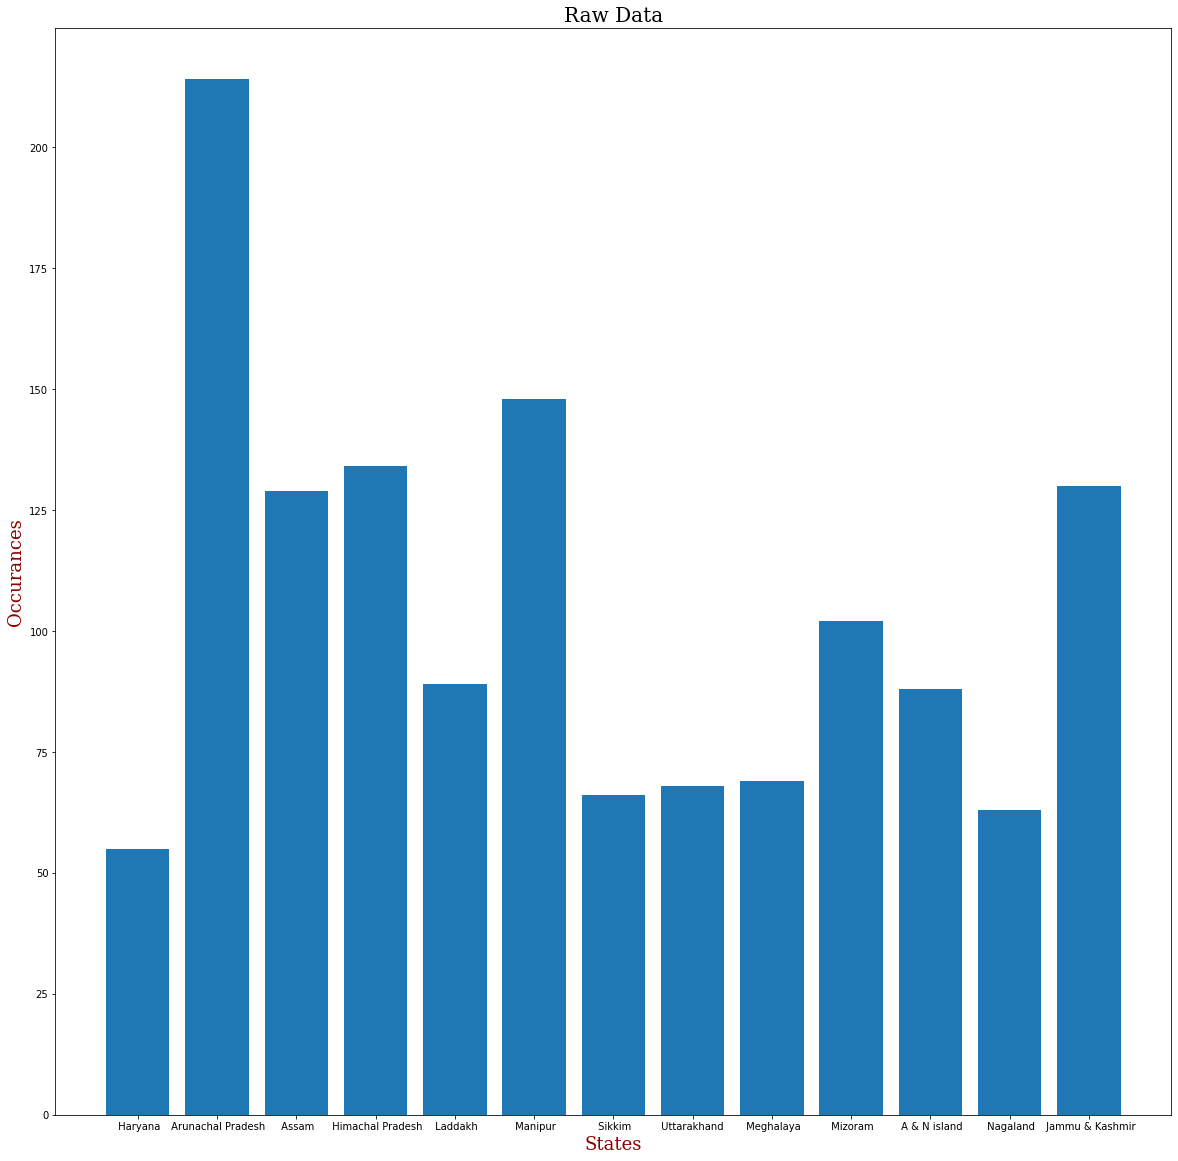

In [6]:
# refactoring and cleaning data
values = []
size = []
indices = []

df.replace(to_replace=" Andaman and Nicobar island", value=" A & N island",inplace=True)
df.replace(to_replace="Maharashtra", value=" Maharashtra",inplace=True)
df.replace(to_replace=" Jammu and Kashmir", value=" Jammu & Kashmir",inplace=True)
df.replace(to_replace="Jammu & Kashmir", value=" Jammu & Kashmir",inplace=True)
df.replace(to_replace=" Uttarakhand", value=" Uttarakhand ",inplace=True)
df.replace(to_replace="Mizoram", value=" Mizoram",inplace=True)




df=df.query("Place != [' India',' Malaysia',' Sri Lanka', ' Afghanistan',' Bangladesh',' Myanmar',' Uzbekistan','Myanmar',' Tajikistan',' Pakistan',' Nepal',' Mongolia',' Kyrgyzstan',' Oman',' Turkmenistan','West Bengal',' West Bengal']")
df


unique = df["Place"].unique()
unique = np.delete(unique,0)
ulist = unique.tolist()

for _,u in enumerate(unique):
    values.append(df[df['Place'].str.contains(u)])
    if(len(values[_]) > 50):
        size.append(len(values[_]))
    else:
        ulist.remove(u)
    
plt.figure(figsize = (20,20))
plt.title("Raw Data",fontdict=title1)
plt.xlabel("States",fontdict=label1)
plt.ylabel("Occurances",fontdict=label1)
# plt.legend()
plt.bar(ulist,size)
# ulist
unique.sort()
unique

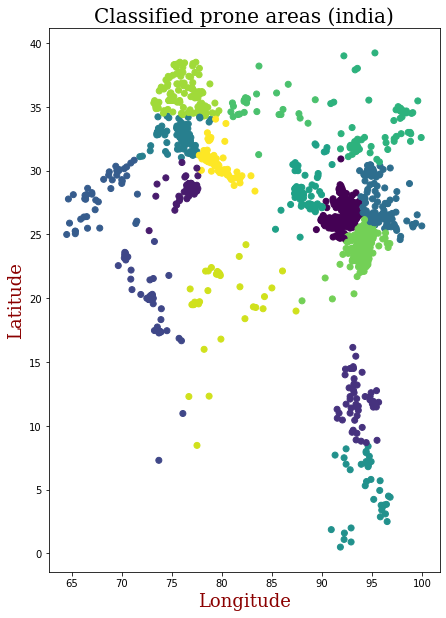

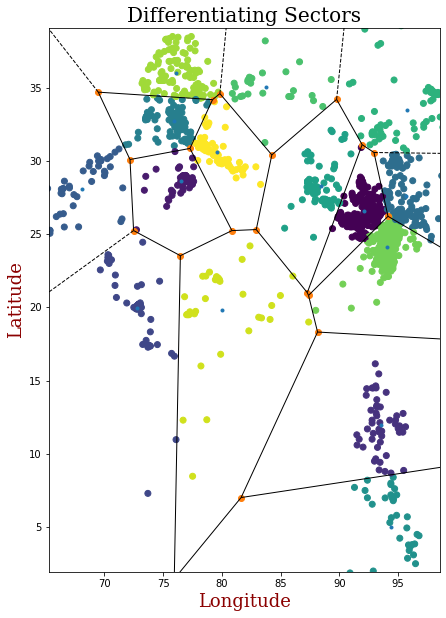

In [64]:
from sklearn.cluster import KMeans
f1 = df['Latitude']
f2 = df['Longitude']
f3 = df['Magnitude']
X = np.array(list(zip(f2,f1)))
kmeans = KMeans(15).fit(X)
centers=kmeans.cluster_centers_
labels = kmeans.predict(X)
plt.figure(figsize = (7,10))
plt.scatter(f2,f1,c = labels)
plt.title("Classified prone areas (india)",fontdict=title1)
plt.xlabel("Longitude",fontdict=label1)
plt.ylabel("Latitude",fontdict=label1)
plt.show()

plt.figure(figsize = (7,10))
plt.scatter(f2,f1,c = labels)
plt.title("Differentiating Sectors",fontdict=title1)
plt.xlabel("Longitude",fontdict=label1)
plt.ylabel("Latitude",fontdict=label1)
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca())


plt.show()

In [9]:
df['color'] = labels
# df.sort_values("color")


df = df.sort_values("color")

# df['Year'] = df['Origin Time'].dt.year
df.insert(loc=1, column='Year', value=df['Origin Time'].dt.year)
# df

In [10]:
# Saving DataSet for futher evaluation
#df.to_csv('transfer.csv', sep=',')

In [11]:
newData =  pd.read_csv('transfer.csv')
newData.head(5)
newData.drop(columns=newData.columns[0], 
        axis=1, 
        inplace=True)
newData

,Origin Time,Year,Latitude,Longitude,Depth,Magnitude,Location,Place,color
0,2020-03-27 18:49:42,2020,32.73,76.20,3.0,3.6,"58km NNW of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
1,2020-03-27 16:21:13,2020,32.74,76.20,5.0,2.9,"59km NNW of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
2,2020-03-27 16:06:48,2020,32.73,76.23,3.0,2.9,"57km N of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
3,2020-03-24 20:07:47,2020,32.90,73.60,22.0,3.4,"84km SW of Rajouri, Jammu and Kashmir",Jammu & Kashmir,0
4,2021-04-03 00:10:20,2021,32.68,76.48,10.0,3.0,"53km NNE of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
...,...,...,...,...,...,...,...,...,...
1629,2019-10-28 19:12:47,2019,29.60,82.00,10.0,3.9,"172km E of Pithoragarh, Uttarakhand, India",Uttarakhand,14
1630,2020-11-10 23:54:00,2020,31.61,78.54,5.0,2.4,"98km N of Uttarkashi, Uttarakhand, India",Uttarakhand,14
1631,2020-01-28 07:44:15,2020,29.40,81.80,15.0,4.2,"154km E of Pithoragarh, Uttarakhand, India",Uttarakhand,14
1632,2020-11-12 01:35:28,2020,31.21,78.26,15.0,2.8,"56km NNW of Uttarkashi, Uttarakhand, India",Uttarakhand,14


In [12]:
# list = []
freq = [] 
sum = 0
count = 0
for i in range(1,len(newData['color'])):
    if(newData.iloc[i][8] == newData.iloc[i-1][8]):
#         sum += df.iloc[i][4]
        count += 1
    else:
#         sum += df.iloc[i][4]
        count += 1
#         list.append(sum/count)
        freq.append(count)
        sum = 0
        count = 0

In [13]:
freq

[213, 279, 49, 143, 76, 45, 39, 107, 70, 95, 260, 116, 28, 37]

<BarContainer object of 14 artists>

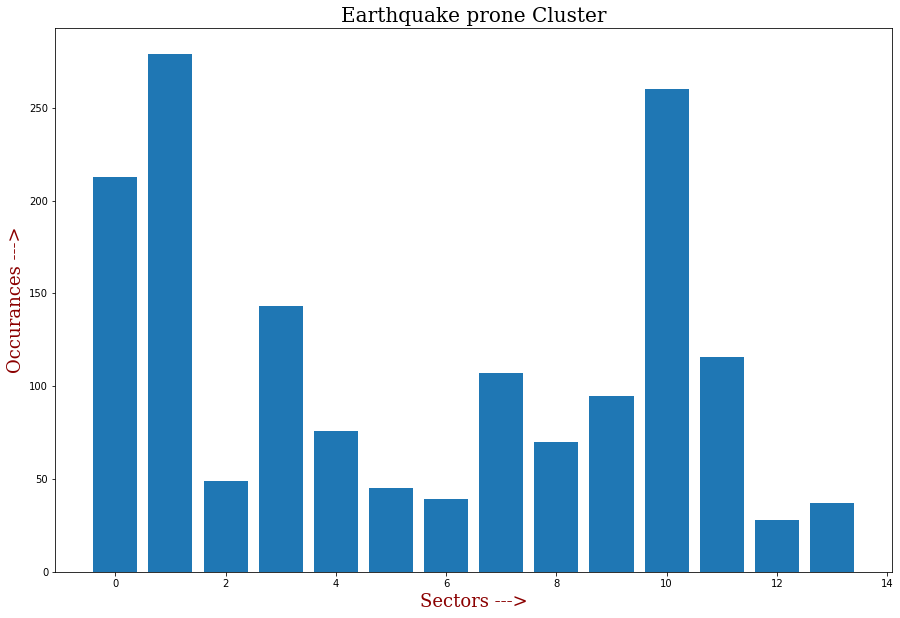

In [52]:
plt.figure(figsize = (15,10))
plt.title("Earthquake prone Cluster",fontdict=title1)
plt.xlabel("Sectors --->",fontdict=label1)
plt.ylabel("Occurances --->",fontdict=label1)
plt.bar(range(len(freq)),freq)

In [16]:
#Considering Sector0 for analysis
sector0 = newData.query("color == 0")
sector0

,Origin Time,Year,Latitude,Longitude,Depth,Magnitude,Location,Place,color
0,2020-03-27 18:49:42,2020,32.73,76.20,3.0,3.6,"58km NNW of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
1,2020-03-27 16:21:13,2020,32.74,76.20,5.0,2.9,"59km NNW of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
2,2020-03-27 16:06:48,2020,32.73,76.23,3.0,2.9,"57km N of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
3,2020-03-24 20:07:47,2020,32.90,73.60,22.0,3.4,"84km SW of Rajouri, Jammu and Kashmir",Jammu & Kashmir,0
4,2021-04-03 00:10:20,2021,32.68,76.48,10.0,3.0,"53km NNE of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
...,...,...,...,...,...,...,...,...,...
208,2020-11-06 06:25:55,2020,32.87,76.20,11.0,2.9,"73km N of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
209,2021-07-21 04:57:46,2021,34.20,77.78,200.0,3.6,"19km ENE of Leh, Laddakh, India",Laddakh,0
210,2020-01-02 19:38:50,2020,32.70,76.50,5.0,3.7,"56km NNE of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
211,2020-10-29 10:50:48,2020,31.93,76.25,5.0,2.5,"32km SSW of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0


In [17]:
#occurance vs magnitude

In [31]:
#Evaluation results for 3 years data --->

In [18]:
year19 = sector0.query("Year == 2019")
occurance19 = pd.to_datetime(year19["Origin Time"]).dt.date
# occurance19 = year19["Origin Time"].dt.date
magnitude19 = year19["Magnitude"].to_list

# del list
lst = list(occurance19)
# magnitude19
# occurance19
# lst


In [20]:
year20 = sector0.query("Year == 2020")
occurance20 = pd.to_datetime(year20["Origin Time"]).dt.date
# occurance19 = year19["Origin Time"].dt.date
magnitude20 = year20["Magnitude"].to_list

# del list
lst = list(occurance20)
# magnitude19
# occurance19
# lst

# plt.figure(figsize = (10,10))
# plt.bar(occurance20,year20["Magnitude"])

In [21]:
year21 = sector0.query("Year == 2021")
occurance21 = pd.to_datetime(year21["Origin Time"]).dt.date
# occurance19 = year19["Origin Time"].dt.date
magnitude21 = year21["Magnitude"].to_list

# del list
lst = list(occurance21)
# magnitude19
# occurance19
# lst

# plt.figure(figsize = (10,10))
# plt.bar(occurance21,year21["Magnitude"])

<BarContainer object of 50 artists>

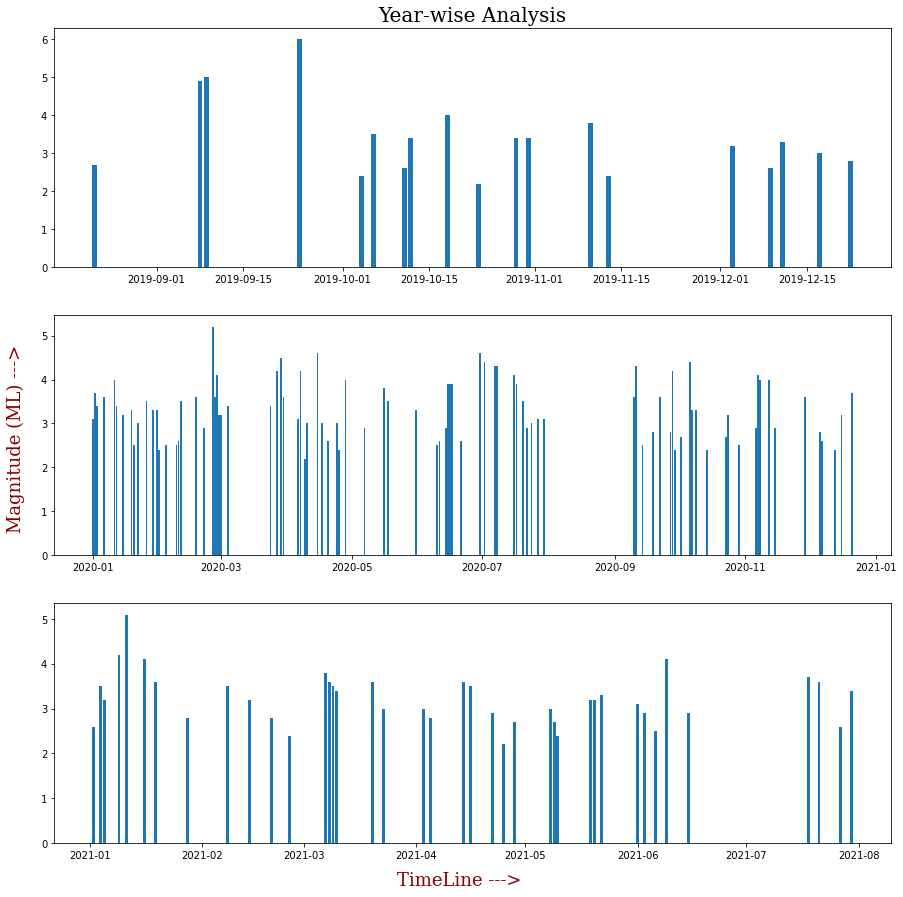

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize = (15,15))
# plt.figure(figsize = (10,10))
fig.text(0.5, 0.09, 'TimeLine --->', ha='center', va='center',fontdict=label1)
fig.text(0.09, 0.5, 'Magnitude (ML) --->', ha='center', va='center', rotation='vertical',fontdict=label1)
ax1.set_title("Year-wise Analysis",fontdict=title1)
ax1.bar(occurance19,year19["Magnitude"])
ax2.bar(occurance20,year20["Magnitude"])
ax3.bar(occurance21,year21["Magnitude"])